In [11]:
#pip install rpy2

### Problem 1 

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://sun9-70.userapi.com/impg/f4EJ4Q2kao65aU8LnK80py-yvBiApWd97hQghA/TQvXWX-sQKw.jpg?size=2142x805&quality=96&sign=61de1fe6d4cff0a3a048664fa2442591&type=album",  width=428, height=160)

### Problem 2 

In [16]:
import pandas as pd
from rpy2 import robjects
from rpy2.robjects import Formula

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr("base")
stats = importr("stats")
DESeq2 = importr("DESeq2")

# Load read counts table
counts = pd.read_csv("colon_cancer_tumor_vs_normal_paired_counts.tsv", sep="\t", index_col=0)

# Define meta for paired
meta = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5, "Patient": list(range(1, 6))*2}, index=counts.columns) # добавляем столбик с номерами пациентов
meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

# Define meta for unpaired
meta_up = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta_up["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta_up["Tissue"]), ref="Normal")

# Calculate normalization factors, paired
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~ Patient + Tissue"))
dds = DESeq2.DESeq(dds)

# Calculate normalization factors, upaired
dds_up = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta_up, design=Formula("~ Tissue"))
dds_up = DESeq2.DESeq(dds_up)

# Results for paired
res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]
res = res.loc[res["log2FoldChange"].abs() >= 1]

# Results for unpaired
res_up = DESeq2.results(dds_up, name="Tissue_Tumor_vs_Normal")
res_up = DESeq2.lfcShrink(dds_up, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res_up = pd.DataFrame(base.as_data_frame(res_up))
res_up.index = counts.index
res_up = res_up.sort_values("padj")
res_up = res_up.loc[res_up["padj"] < 0.05]
res_up = res_up.loc[res_up["log2FoldChange"].abs() >= 1]

R[write to console]:   the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., L

In [24]:
print('Number of genes with dif expression, paired: ', res.shape[0])
print('Number of genes with dif expression, unpaired: ', res_up.shape[0])

Number of genes with dif expression, paired:  3752
Number of genes with dif expression, unpaired:  3698


In [25]:
res.head(10)

,baseMean,log2FoldChange,lfcSE,pvalue,padj
RP11-474D1.3,428.358064,9.198810,0.635203,5.563747e-49,9.340974e-45
CDH3,1514.508985,7.334892,0.524460,1.007906e-46,8.460871e-43
GYLTL1B,1236.554809,5.775434,0.444917,7.321947e-40,4.097605e-36
MMP11,3691.591790,5.142879,0.430594,1.809578e-35,7.595253e-32
COMP,581.759867,7.280009,0.606253,1.018859e-34,3.421126e-31
WNT2,200.409369,5.744275,0.479274,2.008274e-34,5.619486e-31
ATG9B,165.549271,4.306160,0.366394,3.449419e-33,8.273185e-30
CEMIP,2198.304767,5.368031,0.463025,1.107391e-32,2.323999e-29
C2CD4A,543.941121,5.450331,0.486803,2.511388e-30,4.684854e-27
FOXQ1,1984.196069,7.509740,0.681665,1.497362e-29,2.513921e-26


In [26]:
res_up.head(10)

,baseMean,log2FoldChange,lfcSE,pvalue,padj
RP11-474D1.3,428.358064,9.178134,0.593908,1.364930e-54,2.262371e-50
CDH3,1514.508985,7.240486,0.530773,9.231125e-44,7.650295e-40
MMP11,3691.591790,5.176798,0.405912,1.842664e-38,1.018072e-34
WNT2,200.409369,5.736149,0.463340,1.835779e-36,7.607009e-33
ATG9B,165.549271,4.310814,0.349275,2.897243e-36,9.604360e-33
CEMIP,2198.304767,5.345004,0.448791,6.104611e-34,1.686399e-30
SPTBN2,784.826206,3.162476,0.266881,1.503094e-33,3.559111e-30
GYLTL1B,1236.554809,5.805921,0.493538,3.394461e-33,7.032899e-30
C2CD4A,543.941121,5.453214,0.472709,5.122209e-32,9.433401e-29
TRIB3,2446.836922,4.814901,0.427638,1.258391e-30,2.085784e-27


In [32]:
names_p = set(res.iloc[:10].index.tolist())
names_up = set(res_up.iloc[:10].index.tolist())
print('Common genes: ', names_p.intersection(names_up), '\n', '{} in total'.format(len(names_p.intersection(names_up))))

Common genes:  {'MMP11', 'CDH3', 'ATG9B', 'C2CD4A', 'RP11-474D1.3', 'GYLTL1B', 'CEMIP', 'WNT2'} 
 8 in total


### Problem 3

1) DESeq2

In [33]:
# Load read counts table
counts = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_counts.tsv", sep="\t", index_col=0)

# Define meta
meta = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

# Calculate normalization factors
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~ Tissue"))
dds = DESeq2.DESeq(dds)

res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]
res = res.loc[res["log2FoldChange"].abs() >= 1]

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [46]:
names_deseq = set(res.iloc[:10].index.tolist())

2) T-test

In [36]:
from scipy.stats import ttest_ind, mannwhitneyu

In [34]:
df = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv", sep="\t", index_col=0)

In [37]:
df["t-test"] = [ttest_ind(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]

In [38]:
df.head(5)

,TCGA-A6-2682-01A,TCGA-A6-2683-01A,TCGA-A6-2685-01A,TCGA-A6-2686-01A,TCGA-A6-5662-01A,TCGA-A6-5667-11A,TCGA-AA-3489-11A,TCGA-AA-3496-11A,TCGA-AA-3511-11A,TCGA-AA-3514-11A,t-test
A1CF,1.547019,0.894565,1.039517,1.234973,2.044833,2.946113,1.639260,2.426929,2.843991,3.076967,0.005837
A2M,4.582925,4.265146,6.733503,5.365323,4.887795,6.229407,6.419737,7.530414,6.271137,6.456290,0.021117
A4GALT,2.464183,1.029877,2.987627,2.968100,1.008922,2.052049,2.906305,3.246963,2.353158,1.645262,0.530473
AAAS,3.944550,4.208170,3.339402,3.262123,3.867766,3.351890,3.037341,3.224427,3.317121,3.457587,0.051734
AACS,2.516894,3.609837,1.857860,2.025942,1.456029,2.101438,1.949161,1.636366,2.214175,1.967613,0.428299


In [39]:
df.sort_values("t-test", inplace = True)

In [40]:
names_ttest = set(df.iloc[:10].index.tolist())

3) Mann-Whitney

In [41]:
df["mann-whitney"] = [mannwhitneyu(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]

In [42]:
df.head(5)

,TCGA-A6-2682-01A,TCGA-A6-2683-01A,TCGA-A6-2685-01A,TCGA-A6-2686-01A,TCGA-A6-5662-01A,TCGA-A6-5667-11A,TCGA-AA-3489-11A,TCGA-AA-3496-11A,TCGA-AA-3511-11A,TCGA-AA-3514-11A,t-test,mann-whitney
C17orf96,2.208655,2.271381,2.110553,1.931605,2.134961,0.350263,0.378597,0.227003,0.596774,0.293597,3.038037e-08,0.006093
IER5L,3.260536,3.232935,3.700343,3.177976,3.413447,0.829843,1.166137,1.142582,0.841251,1.217703,8.053047e-08,0.006093
FUT1,2.138850,2.079783,2.353682,2.011687,1.926245,0.502530,0.349470,0.595230,0.363252,0.248911,9.848163e-08,0.006093
CDH3,3.854697,5.154501,4.697838,4.577931,4.049763,0.252407,0.853837,0.197600,0.785468,0.114806,5.472875e-07,0.006093
FXYD5,5.300331,5.416488,5.127298,5.509872,5.389215,3.194099,3.194294,3.544618,3.717627,2.970552,8.408204e-07,0.006093


In [43]:
df.sort_values("mann-whitney", inplace = True)

In [44]:
names_mw = set(df.iloc[:10].index.tolist())

In [47]:
print('DESeq2 and t-test', names_deseq.intersection(names_ttest))
print('DESeq2 and Mann-Whitney', names_deseq.intersection(names_mw))
print('t-test and Mann-Whitney', names_ttest.intersection(names_mw))

DESeq2 and t-test {'IER5L', 'C17orf96', 'FUT1'}
DESeq2 and Mann-Whitney set()
t-test and Mann-Whitney set()


### Problem 4

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
ds = counts.loc[names_deseq].T

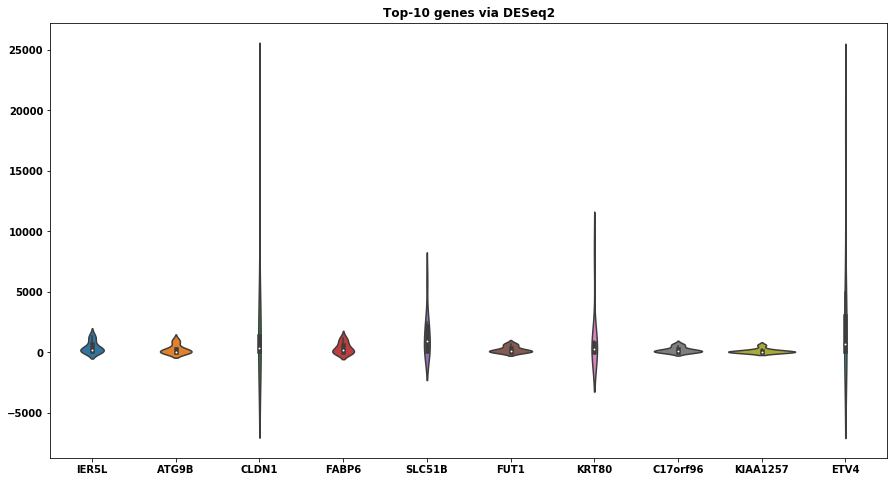

In [70]:
plt.figure(figsize=(15,8))
sns.violinplot(data=ds)
plt.title('Top-10 genes via DESeq2')
plt.show()

In [69]:
tt = df.loc[names_ttest].T

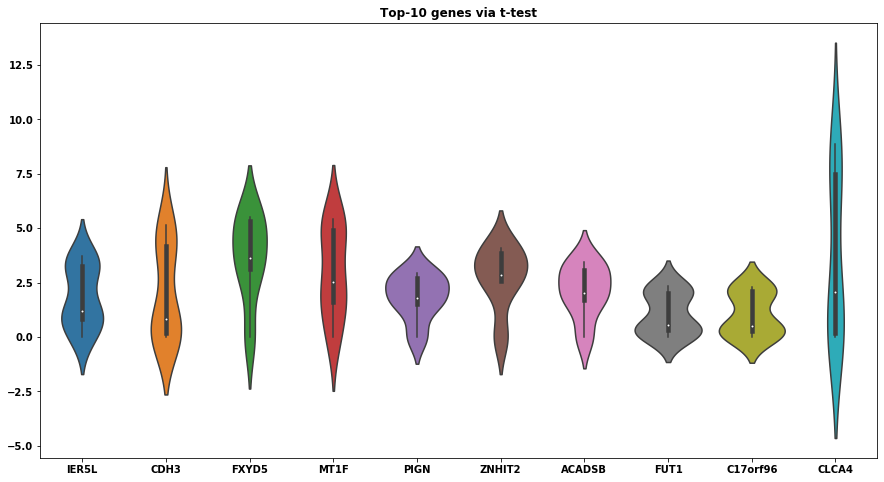

In [71]:
plt.figure(figsize=(15,8))
sns.violinplot(data=tt)
plt.title('Top-10 genes via t-test')
plt.show()

In [74]:
mw = df.loc[names_mw].T

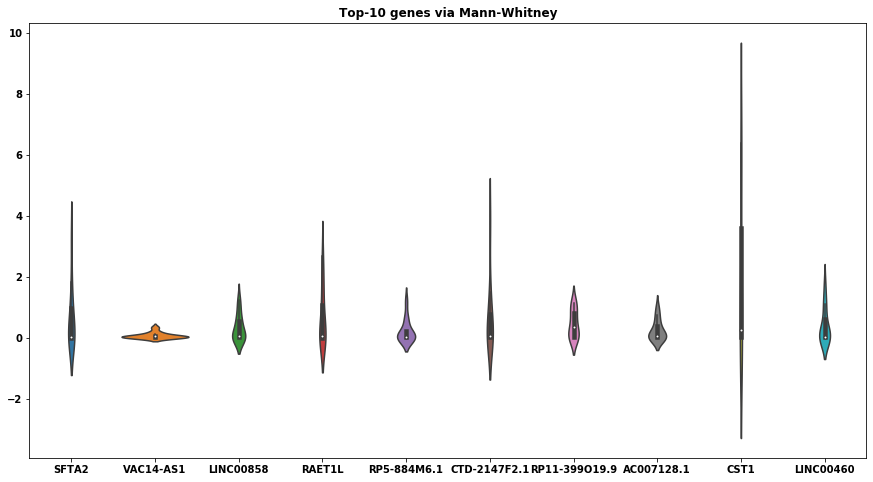

In [75]:
plt.figure(figsize=(15,8))
sns.violinplot(data=mw)
plt.title('Top-10 genes via Mann-Whitney')
plt.show()

### Problem 5

In [76]:
import random

In [77]:
all_g = pd.read_csv('all_genes.txt', sep='\t', header=None, index_col=0)
all_g.head(5)

""
0
5S_rRNA
5_8S_rRNA
7SK
A1BG
A1BG-AS1


In [78]:
for i in range(5):
    all_g.sample(1000).to_csv('all_genes{}.txt'.format(str(i)), header=None, sep='\t')

In [79]:
df = pd.DataFrame({'p-value < 0.05': [21, 40, 43, 49, 35], 'Benjamini < 0.05': [0, 0, 0, 0, 0]})

In [80]:
df

,p-value < 0.05,Benjamini < 0.05
0,21,0
1,40,0
2,43,0
3,49,0
4,35,0
